# Lab6 - Financial Mathematics
Jakub Grunas

# Ex 1

Estimate call option payouts in Black-Scholes model using different methods. Compare estimations to theoretical values, grapically and by variance estimator

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

S_0 = 100
r = 0.1
T = 1
sigma = 1
K1 = 80
K2 = 120
n = 10000000
seeds = [12, 42, 123, 505, 3108]

## Theoretical price

In [2]:
def theoretical_price(S_0, r, T, sigma, K):
    d1 = (np.log(S_0/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S_0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    return price

#### K=80

In [3]:
theoretical_price_K1 = theoretical_price(S_0, r, T, sigma, K1)
theoretical_price_K1

48.36598654140403

#### K=120

In [4]:
theoretical_price_K2 = theoretical_price(S_0, r, T, sigma, K2)
theoretical_price_K2

35.76934353937068

## Monte Carlo

In [16]:
def monte_carlo(S_0, r, T, sigma, K, n, seed):
    np.random.seed(seed)
    z = np.random.standard_normal(n)
    S_T = S_0 * np.exp(sigma * np.sqrt(T) * z + (r - sigma**2 / 2) * T)
    prices = np.maximum(S_T - K, 0)
    prices_estimation = np.cumsum(prices) / np.arange(1,len(prices)+1) * np.exp(-1*r*T)
    return prices_estimation

#### K=80

In [23]:
variance_list_mc = []
price_list_mc = []
price_estimates_list_mc = []

for i, seed in enumerate(seeds):
    price_estimates_mc = monte_carlo(S_0, r, T, sigma, K1,n, seed)
    price_mc = price_estimates_mc[-1]
    
    variance_list_mc.append(np.var(price_estimates_mc, ddof=1)) #ddof=1 - unbiased estimator
    price_list_mc.append(price_mc)
    price_estimates_list_mc.append(price_estimates_mc)
    
    print(f"Estimated option price for run {i+1}:", price_mc)
    print(f"Variance estimator for run {i+1}:", variance_list_mc[i])
    print("_______________________________")
    
print(f"Mean price for Monte Carlo estimation: {np.mean(price_list_mc)}")
print(f"Mean variance estimator for Monte Carlo estimation: {np.mean(variance_list_mc)}")

Estimated option price for run 1: 48.33824840346064
Variance estimator for run 1: 0.01172827532750628
_______________________________
Estimated option price for run 2: 48.35934114584091
Variance estimator for run 2: 0.00923463731250627
_______________________________
Estimated option price for run 3: 48.42005879673907
Variance estimator for run 3: 0.016317262193523894
_______________________________
Estimated option price for run 4: 48.418232039657376
Variance estimator for run 4: 0.012870808969010937
_______________________________
Estimated option price for run 5: 48.32829097999067
Variance estimator for run 5: 0.026944178622157703
_______________________________
Mean price for Monte Carlo estimation: 48.37283427313773
Mean variance estimator for Monte Carlo estimation: 0.015419032484941017


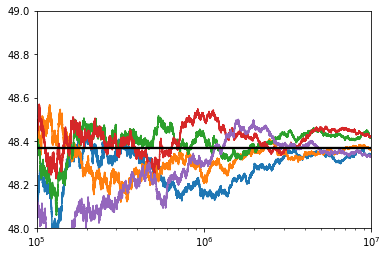

In [29]:
fig, ax = plt.subplots()

for i in range(5):
    ax.plot(price_estimates_list_mc[i])

ax.axhline(y=theoretical_price_K1, color='black', linewidth=2.3)
plt.xlim(100000,10000000)
plt.xscale('log')
plt.ylim(48,49)
plt.show()

#### K=120

In [30]:
variance_list_mc = []
price_list_mc = []
price_estimates_list_mc = []

for i, seed in enumerate(seeds):
    price_estimates_mc = monte_carlo(S_0, r, T, sigma, K2,n, seed)
    price_mc = price_estimates_mc[-1]
    
    variance_list_mc.append(np.var(price_estimates_mc, ddof=1)) #ddof=1 - unbiased estimator
    price_list_mc.append(price_mc)
    price_estimates_list_mc.append(price_estimates_mc)
    
    print(f"Estimated option price for run {i+1}:", price_mc)
    print(f"Variance estimator for run {i+1}:", variance_list_mc[i])
    print("_______________________________")
    
print(f"Mean price for Monte Carlo estimation: {np.mean(price_list_mc)}")
print(f"Mean variance estimator for Monte Carlo estimation: {np.mean(variance_list_mc)}")

Estimated option price for run 1: 35.74372205607605
Variance estimator for run 1: 0.008730041957194111
_______________________________
Estimated option price for run 2: 35.761916592888795
Variance estimator for run 2: 0.0075045733218321795
_______________________________
Estimated option price for run 3: 35.81498794606837
Variance estimator for run 3: 0.01414937418086958
_______________________________
Estimated option price for run 4: 35.81711126455022
Variance estimator for run 4: 0.010181254167973485
_______________________________
Estimated option price for run 5: 35.737302620553386
Variance estimator for run 5: 0.023794097009507475
_______________________________
Mean price for Monte Carlo estimation: 35.77500809602736
Mean variance estimator for Monte Carlo estimation: 0.012871868127475367


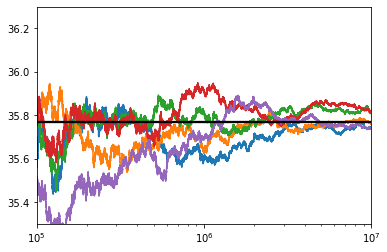

In [32]:
fig, ax = plt.subplots()

for i in range(5):
#     prices_tmp = np.cumsum(price_estimates_list_mc[i]) / np.arange(1,len(price_estimates_list_mc[i])+1) * np.exp(-1*r*T)
    ax.plot(price_estimates_list_mc[i])

ax.axhline(y=theoretical_price_K2, color='black', linewidth=2.3)
plt.xlim(100000,10000000)
plt.xscale('log')
plt.ylim(35.3,36.3)
plt.show()

## Control variates

In [5]:
def control_variates(S_0, r, T, sigma, K, n, seed):
    np.random.seed(seed)
    z = np.random.standard_normal(n)
    S_T = S_0 * np.exp(sigma * np.sqrt(T) * z + (r - sigma**2 / 2) * T)
    prices = np.maximum(S_T - K, 0)
    cv = np.exp(-r * T) * S_T
    coeff = np.cov(prices, cv)[0, 1]/np.var(cv)
    prices -= coeff * (cv - np.mean(cv))
    prices_estimation = np.cumsum(prices) / np.arange(1,len(prices)+1) * np.exp(-1*r*T)
    return prices_estimation

#### K=80

In [6]:
variance_list_cv = []
price_list_cv = []
price_estimates_list_cv = []

for i, seed in enumerate(seeds):
    price_estimates_cv = control_variates(S_0, r, T, sigma, K1,n, seed)
    price_cv = price_estimates_cv[-1]
    
    variance_list_cv.append(np.var(price_estimates_cv, ddof=1)) #ddof=1 - unbiased estimator
    price_list_cv.append(price_cv)
    price_estimates_list_cv.append(price_estimates_cv)
    
    print(f"Estimated option price for run {i+1}:", price_cv)
    print(f"Variance estimator for run {i+1}:", variance_list_cv[i])
    print("_______________________________")
    
print(f"Mean price for Monte Carlo estimation with control variates: {np.mean(price_list_cv)}")
print(f"Mean variance estimator for Monte Carlo estimation with control variates: {np.mean(variance_list_cv)}")

Estimated option price for run 1: 48.338248403451146
Variance estimator for run 1: 0.0007210491125504054
_______________________________
Estimated option price for run 2: 48.35934114583377
Variance estimator for run 2: 0.00037999327315336214
_______________________________
Estimated option price for run 3: 48.42005879674226
Variance estimator for run 3: 0.0006975334407915062
_______________________________
Estimated option price for run 4: 48.418232039658406
Variance estimator for run 4: 0.0004161201883374854
_______________________________
Estimated option price for run 5: 48.32829097999882
Variance estimator for run 5: 0.0006099185540561663
_______________________________
Mean price for Monte Carlo estimation with control variates: 48.37283427313688
Mean variance estimator for Monte Carlo estimation with control variates: 0.000564922913777785


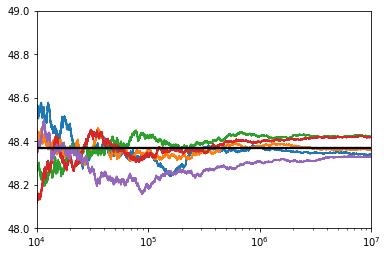

In [7]:
fig, ax = plt.subplots()

for i in range(5):
    ax.plot(price_estimates_list_cv[i])

ax.axhline(y=theoretical_price_K1, color='black', linewidth=2.3)
plt.xlim(10000,10000000)
plt.xscale('log')
plt.ylim(48,49)
plt.show()

#### K=120

In [8]:
variance_list_cv = []
price_list_cv = []
price_estimates_list_cv = []

for i, seed in enumerate(seeds):
    price_estimates_cv = control_variates(S_0, r, T, sigma, K2,n, seed)
    price_cv = price_estimates_cv[-1]
    
    variance_list_cv.append(np.var(price_estimates_cv, ddof=1)) #ddof=1 - unbiased estimator
    price_list_cv.append(price_cv)
    price_estimates_list_cv.append(price_estimates_cv)
    
    print(f"Estimated option price for run {i+1}:", price_cv)
    print(f"Variance estimator for run {i+1}:", variance_list_cv[i])
    print("_______________________________")
    
print(f"Mean price for Monte Carlo estimation with control variates: {np.mean(price_list_cv)}")
print(f"Mean variance estimator for Monte Carlo estimation with control variates: {np.mean(variance_list_cv)}")

Estimated option price for run 1: 35.743722056069664
Variance estimator for run 1: 0.0016930482188239097
_______________________________
Estimated option price for run 2: 35.76191659288404
Variance estimator for run 2: 0.0008229212022884475
_______________________________
Estimated option price for run 3: 35.814987946070175
Variance estimator for run 3: 0.0012563691248165993
_______________________________
Estimated option price for run 4: 35.81711126455019
Variance estimator for run 4: 0.0010552383169608545
_______________________________
Estimated option price for run 5: 35.73730262055191
Variance estimator for run 5: 0.0013218615636138296
_______________________________
Mean price for Monte Carlo estimation with control variates: 35.775008096025196
Mean variance estimator for Monte Carlo estimation with control variates: 0.001229887685300728


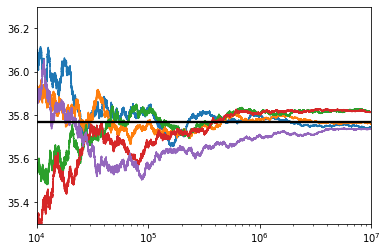

In [10]:
fig, ax = plt.subplots()

for i in range(5):
    ax.plot(price_estimates_list_cv[i])

ax.axhline(y=theoretical_price_K2, color='black', linewidth=2.3)
plt.xlim(10000,10000000)
plt.xscale('log')
plt.ylim(35.3,36.3)
plt.show()

## Turbo control variates

In [11]:
def turbo_cv(S_0, r, T, sigma, K, n, seed):
    np.random.seed(seed)
    z = np.random.standard_normal(n)
    S_T = S_0 * np.exp(sigma * np.sqrt(T) * z + (r - sigma**2 / 2) * T)
    x = np.exp(-r * T) * np.maximum(S_T - K, 0)
    y = S_T
    b_star_hat = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((y - np.mean(y))**2)
    cv = S_T * b_star_hat
    prices = np.maximum(S_T - K, 0) 
    prices -= b_star_hat * (cv - np.mean(cv))
    prices_estimation = np.cumsum(prices) / np.arange(1,len(prices)+1) * np.exp(-1*r*T)
    return prices_estimation

#### K=80

In [13]:
variance_list_turbo_cv = []
price_list_turbo_cv = []
price_estimates_list_turbo_cv = []

for i, seed in enumerate(seeds):
    price_estimates_turbo_cv = turbo_cv(S_0, r, T, sigma, K1,n, seed)
    price_turbo_cv = price_estimates_turbo_cv[-1]
    
    variance_list_turbo_cv.append(np.var(price_estimates_turbo_cv, ddof=1)) #ddof=1 - unbiased estimator
    price_list_turbo_cv.append(price_turbo_cv)
    price_estimates_list_turbo_cv.append(price_estimates_turbo_cv)
    
    print(f"Estimated option price for run {i+1}:", price_turbo_cv)
    print(f"Variance estimator for run {i+1}:", variance_list_turbo_cv[i])
    print("_______________________________")
    
print(f"Mean price for Monte Carlo estimation with control variates: {np.mean(price_list_turbo_cv)}")
print(f"Mean variance estimator for Monte Carlo estimation with control variates: {np.mean(variance_list_turbo_cv)}")

Estimated option price for run 1: 48.3382484034525
Variance estimator for run 1: 0.0008937121032503807
_______________________________
Estimated option price for run 2: 48.359341145831976
Variance estimator for run 2: 0.0006256447955066365
_______________________________
Estimated option price for run 3: 48.4200587967436
Variance estimator for run 3: 0.001979180495518254
_______________________________
Estimated option price for run 4: 48.41823203965863
Variance estimator for run 4: 0.000740772153014202
_______________________________
Estimated option price for run 5: 48.32829097999402
Variance estimator for run 5: 0.002469539950927315
_______________________________
Mean price for Monte Carlo estimation with control variates: 48.37283427313615
Mean variance estimator for Monte Carlo estimation with control variates: 0.0013417698996433577


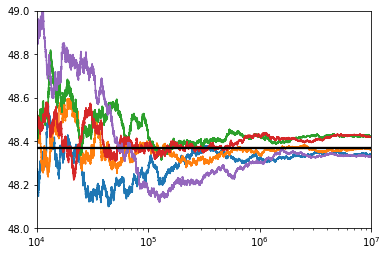

In [14]:
fig, ax = plt.subplots()

for i in range(5):
    ax.plot(price_estimates_list_turbo_cv[i])

ax.axhline(y=theoretical_price_K1, color='black', linewidth=2.3)
plt.xlim(10000,10000000)
plt.xscale('log')
plt.ylim(48,49)
plt.show()

#### K=120

In [15]:
variance_list_turbo_cv = []
price_list_turbo_cv = []
price_estimates_list_turbo_cv = []

for i, seed in enumerate(seeds):
    price_estimates_turbo_cv = turbo_cv(S_0, r, T, sigma, K2,n, seed)
    price_turbo_cv = price_estimates_turbo_cv[-1]
    
    variance_list_turbo_cv.append(np.var(price_estimates_turbo_cv, ddof=1)) #ddof=1 - unbiased estimator
    price_list_turbo_cv.append(price_turbo_cv)
    price_estimates_list_turbo_cv.append(price_estimates_turbo_cv)
    
    print(f"Estimated option price for run {i+1}:", price_turbo_cv)
    print(f"Variance estimator for run {i+1}:", variance_list_turbo_cv[i])
    print("_______________________________")
    
print(f"Mean price for Monte Carlo estimation with control variates: {np.mean(price_list_turbo_cv)}")
print(f"Mean variance estimator for Monte Carlo estimation with control variates: {np.mean(variance_list_turbo_cv)}")

Estimated option price for run 1: 35.74372205607232
Variance estimator for run 1: 0.001436002460091811
_______________________________
Estimated option price for run 2: 35.76191659288473
Variance estimator for run 2: 0.001042831031896498
_______________________________
Estimated option price for run 3: 35.814987946070076
Variance estimator for run 3: 0.0028092251754732104
_______________________________
Estimated option price for run 4: 35.81711126454707
Variance estimator for run 4: 0.0012515005614577074
_______________________________
Estimated option price for run 5: 35.73730262055479
Variance estimator for run 5: 0.0038747428435698394
_______________________________
Mean price for Monte Carlo estimation with control variates: 35.7750080960258
Mean variance estimator for Monte Carlo estimation with control variates: 0.0020828604144978134


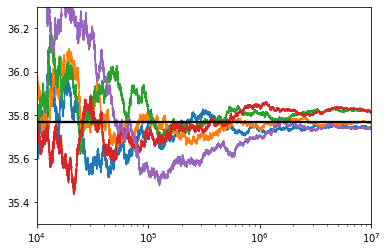

In [16]:
fig, ax = plt.subplots()

for i in range(5):
    ax.plot(price_estimates_list_turbo_cv[i])

ax.axhline(y=theoretical_price_K2, color='black', linewidth=2.3)
plt.xlim(10000,10000000)
plt.xscale('log')
plt.ylim(35.3,36.3)
plt.show()

## Antithetic variables

In [17]:
def antithetic(S_0, r, T, sigma, K, n, seed):
    np.random.seed(seed)
    z = np.random.standard_normal(n // 2)
    z = np.concatenate((z, -z))
    S_T = S_0 * np.exp(sigma * np.sqrt(T) * z + (r - sigma**2 / 2) * T)
    prices = np.maximum(S_T - K, 0)
    prices_estimation = np.cumsum(prices) / np.arange(1,len(prices)+1) * np.exp(-1*r*T)
    return prices_estimation

#### K=80

In [19]:
variance_list_anti = []
price_list_anti = []
price_estimates_list_anti = []

for i, seed in enumerate(seeds):
    price_estimates_anti = antithetic(S_0, r, T, sigma, K1,n, seed)
    price_anti = price_estimates_anti[-1]
    
    variance_list_anti.append(np.var(price_estimates_anti, ddof=1)) #ddof=1 - unbiased estimator
    price_list_anti.append(price_anti)
    price_estimates_list_anti.append(price_estimates_anti)
    
    print(f"Estimated option price for run {i+1}:", price_anti)
    print(f"Variance estimator for run {i+1}:", variance_list_anti[i])
    print("_______________________________")
    
print(f"Mean price for Monte Carlo estimation with antithetic variates: {np.mean(price_list_anti)}")
print(f"Mean variance estimator for Monte Carlo estimation with antithetic variates: {np.mean(variance_list_anti)}")

Estimated option price for run 1: 48.37012622911642
Variance estimator for run 1: 0.01320920807926962
_______________________________
Estimated option price for run 2: 48.37162742411357
Variance estimator for run 2: 0.009791381387915608
_______________________________
Estimated option price for run 3: 48.37654211584904
Variance estimator for run 3: 0.01637851275784467
_______________________________
Estimated option price for run 4: 48.38491917267556
Variance estimator for run 4: 0.012800654646128716
_______________________________
Estimated option price for run 5: 48.32707360692047
Variance estimator for run 5: 0.027781565728955484
_______________________________
Mean price for Monte Carlo estimation with antithetic variates: 48.36605770973501
Mean variance estimator for Monte Carlo estimation with antithetic variates: 0.01599226452002282


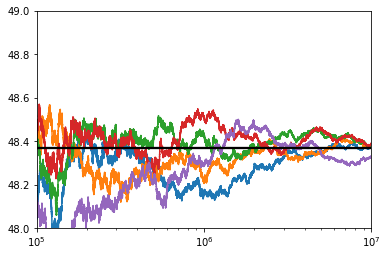

In [21]:
fig, ax = plt.subplots()

for i in range(5):
    ax.plot(price_estimates_list_anti[i])

ax.axhline(y=theoretical_price_K1, color='black', linewidth=2.3)
plt.xlim(100000,10000000)
plt.xscale('log')
plt.ylim(48,49)
plt.show()

#### K=120

In [22]:
variance_list_anti = []
price_list_anti = []
price_estimates_list_anti = []

for i, seed in enumerate(seeds):
    price_estimates_anti = antithetic(S_0, r, T, sigma, K2,n, seed)
    price_anti = price_estimates_anti[-1]
    
    variance_list_anti.append(np.var(price_estimates_anti, ddof=1)) #ddof=1 - unbiased estimator
    price_list_anti.append(price_anti)
    price_estimates_list_anti.append(price_estimates_anti)
    
    print(f"Estimated option price for run {i+1}:", price_anti)
    print(f"Variance estimator for run {i+1}:", variance_list_anti[i])
    print("_______________________________")
    
print(f"Mean price for Monte Carlo estimation with antithetic variates: {np.mean(price_list_anti)}")
print(f"Mean variance estimator for Monte Carlo estimation with antithetic variates: {np.mean(variance_list_anti)}")

Estimated option price for run 1: 35.77079330419351
Variance estimator for run 1: 0.009714278870042158
_______________________________
Estimated option price for run 2: 35.77163245822319
Variance estimator for run 2: 0.007900641538612477
_______________________________
Estimated option price for run 3: 35.7774637917427
Variance estimator for run 3: 0.014150653314279766
_______________________________
Estimated option price for run 4: 35.79294506578502
Variance estimator for run 4: 0.010134302987193975
_______________________________
Estimated option price for run 5: 35.73293480643935
Variance estimator for run 5: 0.024371634298805324
_______________________________
Mean price for Monte Carlo estimation with antithetic variates: 35.76915388527675
Mean variance estimator for Monte Carlo estimation with antithetic variates: 0.013254302201786741


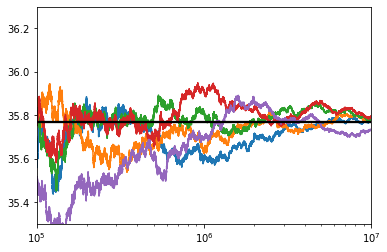

In [23]:
fig, ax = plt.subplots()

for i in range(5):
    ax.plot(price_estimates_list_anti[i])

ax.axhline(y=theoretical_price_K2, color='black', linewidth=2.3)
plt.xlim(100000,10000000)
plt.xscale('log')
plt.ylim(35.3,36.3)
plt.show()